# 0.x Data Gather merge post-processing

Our main objective at this point is to read informtion from xml files from NTCIR12 and YOLO .csv files and merge it into a pandas DataFrame.

0.x# load CSVs from yolo tags and merge data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import seaborn as sns
sns.set()
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [2]:
u_tags=['person', 'chair', 'book', 'tvmonitor', 'laptop', 'bottle', 'cup', 'car', 'diningtable', 'cell phone', 'keyboard', 'bowl', 'mouse', 'clock', 'toilet', 'suitcase', 'sink', 'remote', 'pottedplant', 'refrigerator', 'knife', 'handbag', 'vase', 'aeroplane', 'cat', 'bed', 'sofa', 'backpack', 'tie', 'spoon', 'toothbrush', 'traffic light', 'bicycle', 'train', 'bench', 'microwave', 'bird', 'fork', 'oven', 'motorbike', 'wine glass', 'donut', 'apple', 'pizza', 'scissors', 'umbrella', 'cake', 'bus', 'truck', 'banana', 'parking meter', 'sandwich', 'sports ball', 'broccoli', 'carrot', 'orange', 'teddy bear', 'dog', 'snowboard', 'skateboard', 'boat', 'surfboard', 'frisbee', 'skis', 'hot dog', 'bear', 'elephant', 'toaster', 'stop sign', 'hair drier', 'kite', 'sheep', 'zebra', 'tennis racket', 'baseball bat', 'fire hydrant', 'horse', 'giraffe', 'cow', 'baseball glove']
#u_tags_filtered= ['person', 'laptop', 'tvmonitor', 'book', 'cell phone', 'cup', 'car', 'chair', 'keyboard', 'refrigerator', 'bed', 'mouse', 'toilet', 'zebra', 'fork', 'clock', 'parking meter', 'diningtable', 'microwave', 'umbrella']

In [19]:
csv_file1 = './data_csv/u1_data.csv' #load the csv file

In [20]:
#load the file with a semicolon tab and the specific columns from the list created above
df1= pd.read_csv(csv_file1,sep=';')
df1.head()

,user,date,filename,person,chair,book,tvmonitor,laptop,bottle,cup,...,kite,sheep,zebra,tennis racket,baseball bat,fire hydrant,horse,giraffe,cow,baseball glove
0,u1,23/02/2015,b00000000_21i6bq_20150223_070647e.jpg,0.0,0.00,0.00,0.00,0.0,0.10,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,u1,24/02/2015,b00000000_21i6bq_20150224_064005e.jpg,0.0,0.00,0.00,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,u1,25/02/2015,b00000000_21i6bq_20150225_055403e.jpg,0.0,0.46,0.16,0.00,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,u1,26/02/2015,b00000000_21i6bq_20150226_054349e.jpg,0.0,0.00,0.00,0.85,0.0,0.00,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,u1,28/02/2015,b00000000_21i6bq_20150228_063917e.jpg,0.0,0.18,0.00,0.00,0.0,0.74,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
csv_file2 = './data_csv/u2_data.csv' #load the csv file
#load the file with a semicolon tab and the specific columns from the list created above
df2= pd.read_csv(csv_file2,sep=';')
df2.head()

,user,date,filename,person,chair,book,tvmonitor,laptop,bottle,cup,...,kite,sheep,zebra,tennis racket,baseball bat,fire hydrant,horse,cow,giraffe,baseball glove
0,u2,20/04/2015,b00000000_21i7lf_20150420_093314e.jpg,0.00,0.0,0.17,0.84,0.84,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,u2,20/04/2015,b00000001_21i7lf_20150420_093348e.jpg,0.00,0.0,0.23,0.77,0.82,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,u2,20/04/2015,b00000002_21i7lf_20150420_093419e.jpg,0.26,0.0,0.25,0.84,0.78,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,u2,20/04/2015,b00000003_21i7lf_20150420_093456e.jpg,0.13,0.0,0.29,0.84,0.56,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,u2,20/04/2015,b00000004_21i7lf_20150420_093535e.jpg,0.00,0.0,0.00,0.63,0.75,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [22]:
csv_file3 = './data_csv/u3_data.csv' #load the csv file
#load the file with a semicolon tab and the specific columns from the list created above
df3= pd.read_csv(csv_file3,sep=';')
df3.head()

,user,date,filename,person,chair,book,tvmonitor,laptop,bottle,cup,...,kite,sheep,zebra,tennis racket,baseball bat,fire hydrant,horse,cow,giraffe,baseball glove
0,u3,18/06/2015,b00000000_21i79q_20150618_133919e.jpg,0.46,0.00,0.00,0.0,0.00,0.00,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,u3,18/06/2015,b00000001_21i79q_20150618_134000e.jpg,0.64,0.00,0.00,0.0,0.00,0.14,0.00,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,u3,18/06/2015,b00000002_21i79q_20150618_134034e.jpg,0.00,0.18,0.17,0.0,0.18,0.12,0.63,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,u3,18/06/2015,b00000003_21i79q_20150618_134108e.jpg,0.18,0.00,0.10,0.0,0.00,0.00,0.65,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,u3,18/06/2015,b00000004_21i79q_20150618_134138e.jpg,0.00,0.00,0.14,0.0,0.00,0.00,0.15,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [23]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23134 entries, 0 to 23133
Data columns (total 83 columns):
user              23134 non-null object
date              23134 non-null object
filename          23134 non-null object
person            23134 non-null float64
chair             23134 non-null float64
book              23134 non-null float64
tvmonitor         23134 non-null float64
laptop            23134 non-null float64
bottle            23134 non-null float64
cup               23134 non-null float64
car               23134 non-null float64
diningtable       23134 non-null float64
cell phone        23134 non-null float64
keyboard          23134 non-null float64
bowl              23134 non-null float64
mouse             23134 non-null float64
clock             23134 non-null float64
toilet            23134 non-null float64
sink              23134 non-null float64
remote            23134 non-null float64
suitcase          23134 non-null float64
pottedplant       23134 non-null 

In [24]:
# concatenate all user df files into a single dataframe
columns= df3.columns # get the column list from any df: we select df3
df_all=pd.concat([df1,df2,df3]) #concatenate all data
df_all=df_all.reindex_axis(columns, axis=1) #re-order columns
df_all.user.value_counts()

u1    37139
u2    24401
u3    23134
Name: user, dtype: int64

In [25]:
df_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84674 entries, 0 to 23133
Data columns (total 83 columns):
user              84674 non-null object
date              84674 non-null object
filename          84674 non-null object
person            84674 non-null float64
chair             84674 non-null float64
book              84674 non-null float64
tvmonitor         84674 non-null float64
laptop            84674 non-null float64
bottle            84674 non-null float64
cup               84674 non-null float64
car               84674 non-null float64
diningtable       84674 non-null float64
cell phone        84674 non-null float64
keyboard          84674 non-null float64
bowl              84674 non-null float64
mouse             84674 non-null float64
clock             84674 non-null float64
toilet            84674 non-null float64
sink              84674 non-null float64
remote            84674 non-null float64
suitcase          84674 non-null float64
pottedplant       84674 non-null 

# load data for the XML file

In [26]:
# create a column name list
columns = ['user','age','day_id','date','image_directory','activity','image_id','image_path','location','gender','height','weight']


In [27]:
#load the file with a semicolon tab and the specific columns from the list created above
csv_file = './data_csv/NTCIR-Lifelog_formal_run_dataset.csv' #load the csv file converted from an XML file
df_xml= pd.read_csv(csv_file,sep=';', usecols=columns)
df_xml.head()

,user,age,day_id,date,image_directory,activity,image_id,image_path,location,gender,height,weight
0,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,NaN,NaN,NaN,Home,male,173,78
1,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,NaN,NaN,NaN,Home,male,173,78
2,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,NaN,NaN,NaN,Home,male,173,78
3,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,NaN,NaN,NaN,Home,male,173,78
4,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,NaN,NaN,NaN,Home,male,173,78


In [28]:
df_xml.activity.unique()

array([nan, 'walking', 'transport', 'running', 'cycling', 'car', 'bus'], dtype=object)

6 activities are found and many nan

ADDING EXTRA ACTIVITY tags. list of activities that every index coresponds with the information that we can find as a reference of the activity (number from 0 to 20)

In [29]:
activities = ["Public transport","Driving","Walking outdoors","Walking indoors",
                "Biking","Having drinks with somebody","Having drinks\meal alone",
                "Having meal with somebody","Socializing","Attending a seminar",
                "Meeting","Reading","TV","Cleaning and chores","Working","Cooking",
                "Shopping","Talking","Resting","Mobile","Plane"]

In [30]:
activities[0] #that way we translate the number to the activity

'Public transport'

Here we open the file and get al information into variable lines.

In [31]:
f = open("./data_csv/all_annotated_images.txt")
lines = f.readlines()
#lines

Here, using regular expresions we split every line of information from file we obtaing a list of two elements corresponding to file_path and activity translated to word/words. Some file names follow a different patern anb we use find and '.jpg' string to split it.

In [32]:
import re

def info_formated(string_info):
    if "(1)" not in string_info: 
        file_path,activity_number = re.split("[ ]+", string_info.rstrip())
        return '/'+file_path,activities[int(activity_number)]
 
    else: #casos especiales con nombre con (1) en el nombre de fichero
        return '/'+string_info[:string_info.find(".jpg")+4],activities[int(string_info[string_info.find(".jpg")+5:])]

with open("./data_csv/all_annotated_images.txt") as f:
    all_annotated_images = [info_formated(line) for line in f.readlines()]

#print all_annotated_images

Some examples to check that information obtained with the file and corresponding photo is correct.Every time the cell is executed one picture with the activity as a title is ploted.

('/u3/2015-06-15/b00000915_21i79q_20150615_171442e.jpg', 'Mobile')


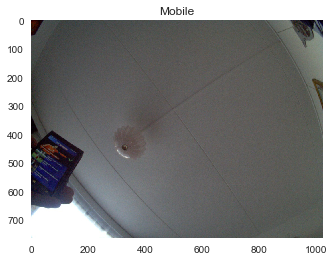

In [33]:
%matplotlib inline
import random
root_file = './data/'
sample = random.choice(all_annotated_images)
print sample
image_file, activity = sample
image_path = root_file + image_file
img = plt.imread(image_path)
plt.title(activity)
plt.grid('off')
plt.imshow(img)

In [34]:
not_empty= df_xml['image_path'].notnull() # create a filter (TRUE/FALSE)  not empty values in 'image path' column
df_xml1=df_xml[not_empty].reset_index() # create new df and reset index
df_xml1.head()

,index,user,age,day_id,date,image_directory,activity,image_id,image_path,location,gender,height,weight
0,424,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,NaN,u1_2015-02-23_070647_1,/u1/2015-02-23/b00000000_21i6bq_20150223_07064...,Home,male,173,78
1,426,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,NaN,u1_2015-02-23_070808_1,/u1/2015-02-23/b00000001_21i6bq_20150223_07080...,Home,male,173,78
2,427,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,NaN,u1_2015-02-23_070809_2,/u1/2015-02-23/b00000002_21i6bq_20150223_07080...,Home,male,173,78
3,428,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,NaN,u1_2015-02-23_070810_3,/u1/2015-02-23/b00000003_21i6bq_20150223_07081...,Home,male,173,78
4,429,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,NaN,u1_2015-02-23_070810_4,/u1/2015-02-23/b00000004_21i6bq_20150223_07081...,Home,male,173,78


In [35]:
df_xml1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88124 entries, 0 to 88123
Data columns (total 13 columns):
index              88124 non-null int64
user               88124 non-null object
age                88124 non-null int64
day_id             88124 non-null int64
date               88124 non-null object
image_directory    88124 non-null object
activity           13883 non-null object
image_id           88124 non-null object
image_path         88124 non-null object
location           49496 non-null object
gender             88124 non-null object
height             88124 non-null int64
weight             88124 non-null int64
dtypes: int64(5), object(8)
memory usage: 8.7+ MB


Before adding all the information from .txt file we check with 1 value that the procedure is correct.

In [36]:
file_path_value = all_annotated_images[2][0]
activity_value = all_annotated_images[2][1]

df_xml1[df_xml1.image_path == file_path_value]

,index,user,age,day_id,date,image_directory,activity,image_id,image_path,location,gender,height,weight
63904,102810,u3,48,54,18/06/2015,NTCIR-Lifelog_images/u3/2015-06-18/,NaN,u3_2015-06-18_180747_2,/u3/2015-06-18/b00000472_21i79q_20150618_18074...,NaN,male,176,85


In [37]:
df_xml1.loc[df_xml1.image_path == all_annotated_images[2][0], 'activity'] = activity_value

last step verification, we check with 1 value that the procedure is correct...

In [38]:
print activity_value
df_xml1[df_xml1.image_path == file_path_value]

Resting


,index,user,age,day_id,date,image_directory,activity,image_id,image_path,location,gender,height,weight
63904,102810,u3,48,54,18/06/2015,NTCIR-Lifelog_images/u3/2015-06-18/,Resting,u3_2015-06-18_180747_2,/u3/2015-06-18/b00000472_21i79q_20150618_18074...,NaN,male,176,85


the activity has been added properly

# We do the same with all images paths and activities we have (might take 30 min to compute):

In [39]:
total =len(all_annotated_images)
count = 1
for sample in all_annotated_images:
    file_path_value = sample[0]
    activity_value = sample[1]
    df_xml1.loc[df_xml1.image_path == file_path_value, 'activity'] = activity_value
    if count%500 == 0:
        print str(count) +' out of '+ str(total)
        count+=1
    else:
        count+=1

500 out of 45000
1000 out of 45000
1500 out of 45000
2000 out of 45000
2500 out of 45000
3000 out of 45000
3500 out of 45000
4000 out of 45000
4500 out of 45000
5000 out of 45000
5500 out of 45000
6000 out of 45000
6500 out of 45000
7000 out of 45000
7500 out of 45000
8000 out of 45000
8500 out of 45000
9000 out of 45000
9500 out of 45000
10000 out of 45000
10500 out of 45000
11000 out of 45000
11500 out of 45000
12000 out of 45000
12500 out of 45000
13000 out of 45000
13500 out of 45000
14000 out of 45000
14500 out of 45000
15000 out of 45000
15500 out of 45000
16000 out of 45000
16500 out of 45000
17000 out of 45000
17500 out of 45000
18000 out of 45000
18500 out of 45000
19000 out of 45000
19500 out of 45000
20000 out of 45000
20500 out of 45000
21000 out of 45000
21500 out of 45000
22000 out of 45000
22500 out of 45000
23000 out of 45000
23500 out of 45000
24000 out of 45000
24500 out of 45000
25000 out of 45000
25500 out of 45000
26000 out of 45000
26500 out of 45000
27000 out of 

In [40]:
def getname(data):
    return data.split('/')[3] 

df_xml1['filename']=df_xml1['image_path'].apply(getname) # add new column with the name of the jpg file

In [41]:
df_xml1.head()
df_xml1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88124 entries, 0 to 88123
Data columns (total 14 columns):
index              88124 non-null int64
user               88124 non-null object
age                88124 non-null int64
day_id             88124 non-null int64
date               88124 non-null object
image_directory    88124 non-null object
activity           49903 non-null object
image_id           88124 non-null object
image_path         88124 non-null object
location           49496 non-null object
gender             88124 non-null object
height             88124 non-null int64
weight             88124 non-null int64
filename           88124 non-null object
dtypes: int64(5), object(9)
memory usage: 9.4+ MB


In [42]:
df_xml1.activity.value_counts()

Working                        6971
Resting                        5365
Mobile                         5045
Walking outdoors               3476
Driving                        3001
Talking                        2651
walking                        2533
transport                      2102
Socializing                    1825
Meeting                        1776
Walking indoors                1741
Having drinks\meal alone       1652
Public transport               1574
Having drinks with somebody    1418
TV                             1389
Shopping                       1175
Reading                        1174
Having meal with somebody      1065
Plane                          1030
Attending a seminar            1023
Cleaning and chores             827
Cooking                         575
Biking                          247
bus                             219
running                          38
car                               7
cycling                           4
Name: activity, dtype: int64

there are activities that seems the same such as walking, Walking indoors, Walking outdoors

Before we do anything further with the data let's merge this dataFrame with the previous dataframe from the image analysis from different users

# merge df_xml1 and df_all

In [152]:
df=pd.merge(df_xml1,df_all, on='filename')

In [153]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84674 entries, 0 to 84673
Data columns (total 96 columns):
index              84674 non-null int64
user_x             84674 non-null object
age                84674 non-null int64
day_id             84674 non-null int64
date_x             84674 non-null object
image_directory    84674 non-null object
activity           47764 non-null object
image_id           84674 non-null object
image_path         84674 non-null object
location           48838 non-null object
gender             84674 non-null object
height             84674 non-null int64
weight             84674 non-null int64
filename           84674 non-null object
user_y             84674 non-null object
date_y             84674 non-null object
person             84674 non-null float64
chair              84674 non-null float64
book               84674 non-null float64
tvmonitor          84674 non-null float64
laptop             84674 non-null float64
bottle             84674 non-n

In [154]:
df.head(1)

,index,user_x,age,day_id,date_x,image_directory,activity,image_id,image_path,location,...,kite,sheep,zebra,tennis racket,baseball bat,fire hydrant,horse,cow,giraffe,baseball glove
0,424,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,NaN,u1_2015-02-23_070647_1,/u1/2015-02-23/b00000000_21i6bq_20150223_07064...,Home,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [155]:
df = df.rename(columns={'user_x': 'user', 'date_x': 'date'})

In [156]:
df.columns

Index([u'index', u'user', u'age', u'day_id', u'date', u'image_directory',
       u'activity', u'image_id', u'image_path', u'location', u'gender',
       u'height', u'weight', u'filename', u'user_y', u'date_y', u'person',
       u'chair', u'book', u'tvmonitor', u'laptop', u'bottle', u'cup', u'car',
       u'diningtable', u'cell phone', u'keyboard', u'bowl', u'mouse', u'clock',
       u'toilet', u'sink', u'remote', u'suitcase', u'pottedplant',
       u'refrigerator', u'knife', u'handbag', u'vase', u'aeroplane', u'cat',
       u'bed', u'sofa', u'backpack', u'tie', u'spoon', u'toothbrush',
       u'traffic light', u'bicycle', u'train', u'bird', u'microwave', u'bench',
       u'fork', u'oven', u'motorbike', u'donut', u'wine glass', u'pizza',
       u'apple', u'scissors', u'umbrella', u'cake', u'bus', u'truck',
       u'banana', u'parking meter', u'sandwich', u'sports ball', u'broccoli',
       u'carrot', u'orange', u'teddy bear', u'dog', u'snowboard',
       u'skateboard', u'boat', u'surfbo

In [157]:
new_columns=['user', 'age', 'day_id','date', 'activity','image_path','filename','location',
             'gender', 'height', 'weight','person','chair', 'book', 'tvmonitor', 'laptop', 'bottle','cup', 'car','diningtable', 'cell phone',
             'keyboard', 'bowl', 'mouse', 'clock','toilet', 'sink', 'remote', 'suitcase', 'pottedplant','refrigerator',
             'knife', 'handbag', 'vase', 'aeroplane', 'cat','bed', 'sofa', 'backpack', 'tie', 'spoon', 'toothbrush',
             'traffic light', 'bicycle', 'train', 'bird', 'microwave', 'bench','fork', 'oven', 'motorbike', 'donut',
             'wine glass', 'pizza','apple', 'scissors', 'umbrella', 'cake', 'bus', 'truck','banana', 'parking meter',
             'sandwich', 'sports ball', 'broccoli','carrot', 'orange', 'teddy bear', 'dog', 'snowboard','skateboard', 'boat',
             'surfboard', 'frisbee', 'skis', 'hot dog','bear', 'elephant', 'toaster', 'stop sign', 'hair drier', 'kite',
             'sheep', 'zebra', 'tennis racket', 'baseball bat', 'fire hydrant','horse', 'cow', 'giraffe', 'baseball glove']

In [158]:
df.shape

(84674, 96)

remove rows where there is any NaN in the activity column

In [159]:
df=df[df.activity.notnull()]

In [160]:
df.head(1)

,index,user,age,day_id,date,image_directory,activity,image_id,image_path,location,...,kite,sheep,zebra,tennis racket,baseball bat,fire hydrant,horse,cow,giraffe,baseball glove
6,431,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,Mobile,u1_2015-02-23_070812_6,/u1/2015-02-23/b00000006_21i6bq_20150223_07081...,Home,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [161]:
df.shape

(47764, 96)

In [162]:
# coming back on the activity...
df.activity.value_counts()

Working                        6443
Resting                        4809
Mobile                         4694
Walking outdoors               3440
Driving                        2866
Talking                        2599
walking                        2504
transport                      2065
Socializing                    1825
Meeting                        1776
Walking indoors                1723
Having drinks\meal alone       1587
Public transport               1574
Having drinks with somebody    1418
TV                             1220
Reading                        1167
Shopping                       1113
Having meal with somebody      1033
Plane                          1030
Attending a seminar            1023
Cleaning and chores             793
Cooking                         547
Biking                          247
bus                             219
running                          38
car                               7
cycling                           4
Name: activity, dtype: int64

remove car and cycling as there are few occurrences

In [163]:
def activity_list(action): # return a list of files with the specific activity
    data = df[df.activity==action]['image_path'].values
    return data

In [164]:
# drop these 2 activities from dataframe
#df = df[df.activity != 'cycling']
df = df[df.activity != 'car']

In [165]:
#convert cycling as Biking activity
samples=activity_list('cycling')
new_value='Biking'
for sample in samples:
    row_index= df[df.image_path == sample].index[0]
    df.loc[row_index,'activity']= new_value
    

In [166]:
#convert running as walking activity
samples=activity_list('running')
new_value='walking'
for sample in samples:
    row_index= df[df.image_path == sample].index[0]
    df.loc[row_index,'activity']= new_value
    

In [167]:
#convert Walking outdoors and Walking indoors as walking activity
samples=activity_list('Walking outdoors')
new_value='walking'
for sample in samples:
    row_index= df[df.image_path == sample].index[0]
    df.loc[row_index,'activity']= new_value
    
samples=activity_list('Walking indoors')
new_value='walking'
for sample in samples:
    row_index= df[df.image_path == sample].index[0]
    df.loc[row_index,'activity']= new_value


In [168]:
#convert bus and Public transport as transport
samples=activity_list('bus')
new_value='transport'
for sample in samples:
    row_index= df[df.image_path == sample].index[0]
    df.loc[row_index,'activity']= new_value

samples=activity_list('Public transport')
new_value='transport'
for sample in samples:
    row_index= df[df.image_path == sample].index[0]
    df.loc[row_index,'activity']= new_value
    

In [169]:
len(df.activity.value_counts())

20

In [171]:
#convert to lower case
df.activity= df.activity.str.lower()

check a random activity

/u1/2015-02-23/b00000936_21i6bq_20150223_171917e.jpg


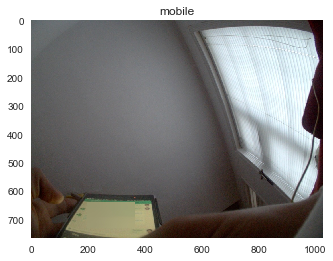

In [172]:
%matplotlib inline
root_file = './data'
action = 'mobile' #get these images with this activity
sample = random.choice(activity_list(action)) #take one image at random
print sample
image_path = root_file + sample
img = plt.imread(image_path)
plt.title(action)
plt.grid('off')
plt.imshow(img)

In [173]:
df.reset_index()
df.head()

,index,user,age,day_id,date,image_directory,activity,image_id,image_path,location,...,kite,sheep,zebra,tennis racket,baseball bat,fire hydrant,horse,cow,giraffe,baseball glove
6,431,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,mobile,u1_2015-02-23_070812_6,/u1/2015-02-23/b00000006_21i6bq_20150223_07081...,Home,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,432,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070813_7,/u1/2015-02-23/b00000007_21i6bq_20150223_07081...,Home,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,433,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070813_8,/u1/2015-02-23/b00000008_21i6bq_20150223_07081...,Home,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,434,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070814_9,/u1/2015-02-23/b00000009_21i6bq_20150223_07081...,Home,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,435,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070822_10,/u1/2015-02-23/b00000010_21i6bq_20150223_07082...,Home,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [174]:
df.shape

(47757, 96)

In [175]:
#we add this 2 columns to the dataframe
df['day_of_week'] = pd.to_datetime(df['date']).dt.dayofweek
df['day_of_week_name'] = pd.to_datetime(df['date']).dt.weekday_name

In [176]:
df.head()

,index,user,age,day_id,date,image_directory,activity,image_id,image_path,location,...,zebra,tennis racket,baseball bat,fire hydrant,horse,cow,giraffe,baseball glove,day_of_week,day_of_week_name
6,431,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,mobile,u1_2015-02-23_070812_6,/u1/2015-02-23/b00000006_21i6bq_20150223_07081...,Home,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday
7,432,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070813_7,/u1/2015-02-23/b00000007_21i6bq_20150223_07081...,Home,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday
8,433,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070813_8,/u1/2015-02-23/b00000008_21i6bq_20150223_07081...,Home,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday
9,434,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070814_9,/u1/2015-02-23/b00000009_21i6bq_20150223_07081...,Home,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday
10,435,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070822_10,/u1/2015-02-23/b00000010_21i6bq_20150223_07082...,Home,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday


In [177]:
df_new=df.copy()

get time and convert date+time into a timestamp index

In [178]:
date=(df_new['image_id'].str[3:13])
df_new['date_new'] = pd.to_datetime(date)
#time = (df['image_id'].str[14:20])
hora= (df_new['image_id'].str[14:16].astype(int))*3600
minutes = (df_new['image_id'].str[16:18].astype(int))*60
seconds = (df_new['image_id'].str[18:20].astype(int))*1
total = hora+minutes+seconds

#df['HH:MM:SS']=pd.TimeSeries((time).astype(str), format='%H%M%S')
df_new['horario'] = pd.to_timedelta((total).astype('int'), unit='s') #convert seconds to HH:MM:SS and add to new column
#to_timedelta

In [179]:
df_new.head()

,index,user,age,day_id,date,image_directory,activity,image_id,image_path,location,...,baseball bat,fire hydrant,horse,cow,giraffe,baseball glove,day_of_week,day_of_week_name,date_new,horario
6,431,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,mobile,u1_2015-02-23_070812_6,/u1/2015-02-23/b00000006_21i6bq_20150223_07081...,Home,...,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-02-23,07:08:12
7,432,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070813_7,/u1/2015-02-23/b00000007_21i6bq_20150223_07081...,Home,...,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-02-23,07:08:13
8,433,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070813_8,/u1/2015-02-23/b00000008_21i6bq_20150223_07081...,Home,...,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-02-23,07:08:13
9,434,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070814_9,/u1/2015-02-23/b00000009_21i6bq_20150223_07081...,Home,...,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-02-23,07:08:14
10,435,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070822_10,/u1/2015-02-23/b00000010_21i6bq_20150223_07082...,Home,...,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-02-23,07:08:22


In [181]:
print type(df_new['date_new'])
print type(df_new['horario'])

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


In [182]:
#df.index = df['date']+df['hora']
df_new.index = df_new['date_new']+df_new['horario']
# we assign the date and time as the index series

In [183]:
# remove unwanted columns
df_new=df_new.drop("index",axis = 1)

In [185]:
df_new=df_new.drop('horario',axis =1)
df_new.head()

,user,age,day_id,date,image_directory,activity,image_id,image_path,location,gender,...,tennis racket,baseball bat,fire hydrant,horse,cow,giraffe,baseball glove,day_of_week,day_of_week_name,date_new
2015-02-23 07:08:12,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,mobile,u1_2015-02-23_070812_6,/u1/2015-02-23/b00000006_21i6bq_20150223_07081...,Home,male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-02-23
2015-02-23 07:08:13,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070813_7,/u1/2015-02-23/b00000007_21i6bq_20150223_07081...,Home,male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-02-23
2015-02-23 07:08:13,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070813_8,/u1/2015-02-23/b00000008_21i6bq_20150223_07081...,Home,male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-02-23
2015-02-23 07:08:14,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070814_9,/u1/2015-02-23/b00000009_21i6bq_20150223_07081...,Home,male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-02-23
2015-02-23 07:08:22,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070822_10,/u1/2015-02-23/b00000010_21i6bq_20150223_07082...,Home,male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-02-23


In [186]:
# remove other columns like user_y, date_y
df_new=df_new.drop(['user_y','date_y'],axis =1)
df_new.columns

Index([u'user', u'age', u'day_id', u'date', u'image_directory', u'activity',
       u'image_id', u'image_path', u'location', u'gender', u'height',
       u'weight', u'filename', u'person', u'chair', u'book', u'tvmonitor',
       u'laptop', u'bottle', u'cup', u'car', u'diningtable', u'cell phone',
       u'keyboard', u'bowl', u'mouse', u'clock', u'toilet', u'sink', u'remote',
       u'suitcase', u'pottedplant', u'refrigerator', u'knife', u'handbag',
       u'vase', u'aeroplane', u'cat', u'bed', u'sofa', u'backpack', u'tie',
       u'spoon', u'toothbrush', u'traffic light', u'bicycle', u'train',
       u'bird', u'microwave', u'bench', u'fork', u'oven', u'motorbike',
       u'donut', u'wine glass', u'pizza', u'apple', u'scissors', u'umbrella',
       u'cake', u'bus', u'truck', u'banana', u'parking meter', u'sandwich',
       u'sports ball', u'broccoli', u'carrot', u'orange', u'teddy bear',
       u'dog', u'snowboard', u'skateboard', u'boat', u'surfboard', u'frisbee',
       u'skis', u'hot

In [188]:
df_new.to_csv('./data_csv/ntcir12.csv')

END

In [189]:
df=pd.read_csv('./data_csv/ntcir12.csv',sep=',', index_col='Unnamed: 0')

In [190]:
df.head()

,user,age,day_id,date,image_directory,activity,image_id,image_path,location,gender,...,tennis racket,baseball bat,fire hydrant,horse,cow,giraffe,baseball glove,day_of_week,day_of_week_name,date_new
2015-02-23 07:08:12,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,mobile,u1_2015-02-23_070812_6,/u1/2015-02-23/b00000006_21i6bq_20150223_07081...,Home,male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-02-23
2015-02-23 07:08:13,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070813_7,/u1/2015-02-23/b00000007_21i6bq_20150223_07081...,Home,male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-02-23
2015-02-23 07:08:13,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070813_8,/u1/2015-02-23/b00000008_21i6bq_20150223_07081...,Home,male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-02-23
2015-02-23 07:08:14,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070814_9,/u1/2015-02-23/b00000009_21i6bq_20150223_07081...,Home,male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-02-23
2015-02-23 07:08:22,u1,40,1,23/02/2015,NTCIR-Lifelog_images/u1/2015-02-23/,cooking,u1_2015-02-23_070822_10,/u1/2015-02-23/b00000010_21i6bq_20150223_07082...,Home,male,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0,Monday,2015-02-23


In [191]:
df.index

Index([u'2015-02-23 07:08:12', u'2015-02-23 07:08:13', u'2015-02-23 07:08:13',
       u'2015-02-23 07:08:14', u'2015-02-23 07:08:22', u'2015-02-23 07:08:59',
       u'2015-02-23 07:09:31', u'2015-02-23 07:10:08', u'2015-02-23 07:10:46',
       u'2015-02-23 07:11:19',
       ...
       u'2015-08-03 18:10:17', u'2015-08-03 18:10:47', u'2015-08-03 18:11:17',
       u'2015-08-03 18:11:47', u'2015-08-03 18:12:17', u'2015-08-03 18:12:47',
       u'2015-08-03 18:13:17', u'2015-08-03 18:13:53', u'2015-08-03 20:24:11',
       u'2015-08-03 20:24:41'],
      dtype='object', length=47757)

In [192]:
df.index = pd.to_datetime(df.index)

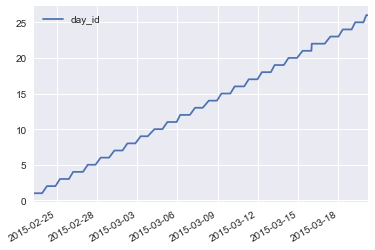

In [197]:
df1=df[df['user']=='u1']
df1.plot(df1.index,'day_id')
plt.show()